In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

In [28]:
# Load the data from the CSV file
file_path = r"L:\PhD_Prototype\ResearchDesign01_Physio Prototype\ECG Measurement\Test_Shimmer_GSR_PPG\00_20240815_GSR_Test_Session1_Shimmer_40ED_Calibrated_SD.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()

,Shimmer_40ED_Timestamp_FormattedUnix_CAL,Shimmer_40ED_GSR_Range_CAL,Shimmer_40ED_GSR_Skin_Conductance_CAL,Shimmer_40ED_GSR_Skin_Resistance_CAL,Shimmer_40ED_PPG_A13_CAL
0,yyyy/mm/dd hh:mm:ss.000,no_units,uS,kOhms,mV
1,2024/08/15 10:43:17,3,2.22E-04,4504500,824.1758242
2,2024/08/15 10:43:17,3,2.22E-04,4504500,824.1758242
3,2024/08/15 10:43:17,0,-0.200462887,-4988.454545,824.9084249
4,2024/08/15 10:43:18,0,-0.200462887,-4988.454545,838.0952381


In [29]:
# Extract the PPG signal data and convert it to numeric
ppg_data = pd.to_numeric(data['Shimmer_40ED_PPG_A13_CAL'], errors='coerce')

# Drop any NaN values that might have resulted from the conversion
ppg_data = ppg_data.dropna()

In [30]:
# Define a low-pass filter to remove high-frequency noise
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Apply the filter to the PPG signal
cutoff_frequency = 2.0  # Cutoff frequency in Hz
sampling_rate = 51  # Sampling rate in Hz
filtered_ppg = butter_lowpass_filter(ppg_data, cutoff=cutoff_frequency, fs=sampling_rate)

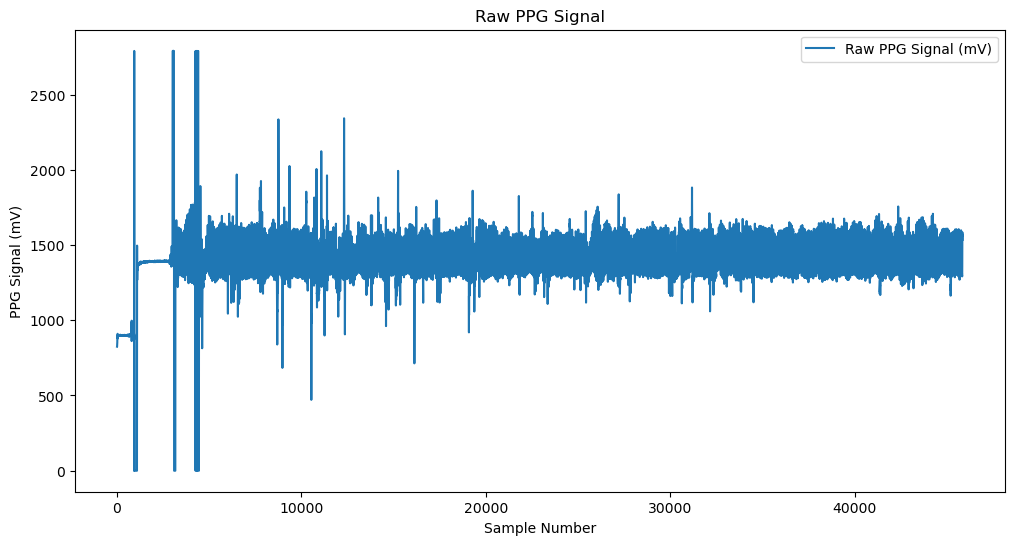

In [31]:
# Plot the raw PPG signal to visualize it
plt.figure(figsize=(12, 6))
plt.plot(ppg_data, label='Raw PPG Signal (mV)')
plt.title('Raw PPG Signal')
plt.xlabel('Sample Number')
plt.ylabel('PPG Signal (mV)')
plt.legend()
plt.show()

In [19]:
# Find the peaks in the PPG signal, which correspond to heartbeats
peaks, _ = find_peaks(ppg_data, distance=50)  # Adjust distance based on the sampling rate

In [34]:
# Convert peak indices to time in seconds
peak_times = peaks / sampling_rate

# Calculate the R-R intervals (time between consecutive peaks)
rr_intervals = np.diff(peak_times)

# Calculate the heart rate (BPM)
heart_rate = 60 / rr_intervals


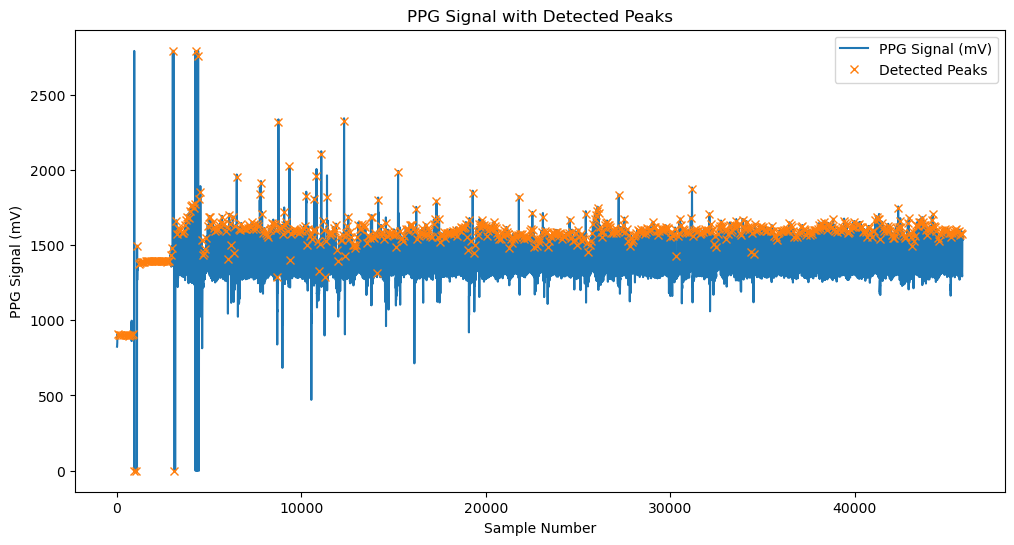

In [35]:
# Plot the PPG signal with detected peaks
plt.figure(figsize=(12, 6))

plt.plot(ppg_data, label='PPG Signal (mV)')
plt.plot(peaks, ppg_data[peaks], "x", label='Detected Peaks')

plt.title('PPG Signal with Detected Peaks')
plt.xlabel('Sample Number')
plt.ylabel('PPG Signal (mV)')
plt.legend()
plt.show()


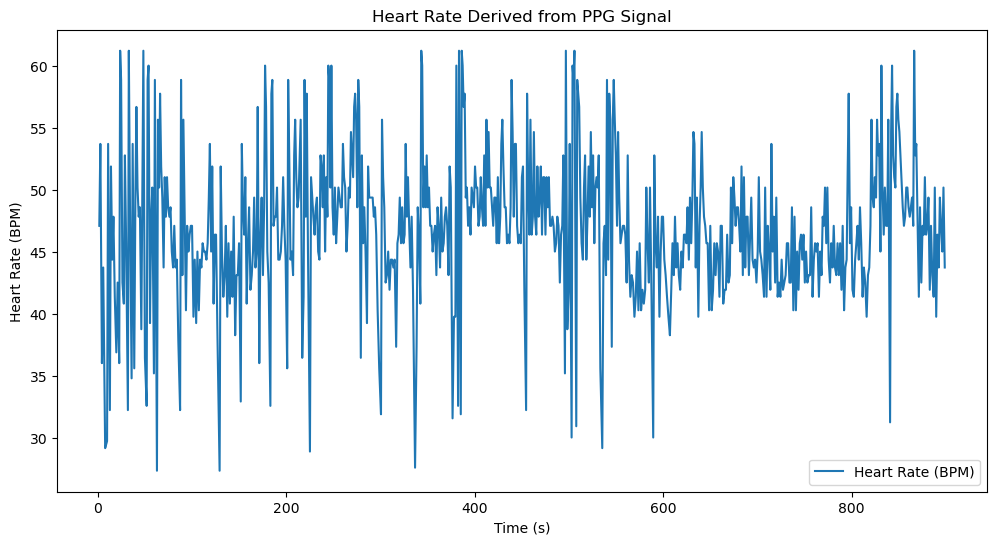

In [36]:
# Plot the heart rate over time
plt.figure(figsize=(12, 6))

plt.plot(peak_times[1:], heart_rate, label='Heart Rate (BPM)')
plt.title('Heart Rate Derived from PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')
plt.legend()

plt.show()
